In [3]:
## Импортируем Pandas и загрузим данные
import pandas as pd

In [5]:
Data_Train = pd.read_excel("train.xlsx", engine="openpyxl")
Data_Test  = pd.read_excel("test.xlsx", engine="openpyxl")

In [196]:
## Взглянем, что из cебя представляют данные 
(Data_Train.head() , Data_Test.head())

(          dt  Цена на арматуру
 0 2015-01-05             32900
 1 2015-01-12             32500
 2 2015-01-19             32000
 3 2015-01-26             30700
 4 2015-02-02             30300,
           dt  Цена на арматуру
 0 2022-09-05             46000
 1 2022-09-12             46000
 2 2022-09-19             46000
 3 2022-09-26             45500
 4 2022-10-03             45500)

In [197]:
print(f"В Датафрейме Data_Train Строк:{Data_Train.shape[0]} Колонок: {Data_Train.shape[1]}")
print(f"В Датафрейме Data_Test Строк:{Data_Test.shape[0]} Колонок: {Data_Test.shape[1]}")

В Датафрейме Data_Train Строк:400 Колонок: 2
В Датафрейме Data_Test Строк:28 Колонок: 2


In [198]:
### Взглянем есть ли пропуски 


colums_is_nul = Data_Train.isnull().mean() * 100 
columns_show = colums_is_nul[colums_is_nul > 0.1]

print("-" * 60)
print(f"Количество колонок в Data_Train с более чем 10% пропусков: {len(columns_show)}")

colums_is_nul = Data_Test.isnull().mean() * 100 
columns_show = colums_is_nul[colums_is_nul > 0.1]

print("-" * 60)
print(f"Количество колонок в Data_Tast с более чем 10% пропусков: {len(columns_show)}")


------------------------------------------------------------
Количество колонок в Data_Train с более чем 10% пропусков: 0
------------------------------------------------------------
Количество колонок в Data_Tast с более чем 10% пропусков: 0


In [45]:
### Визуализируем

import matplotlib.pyplot as plt
import seaborn as sns

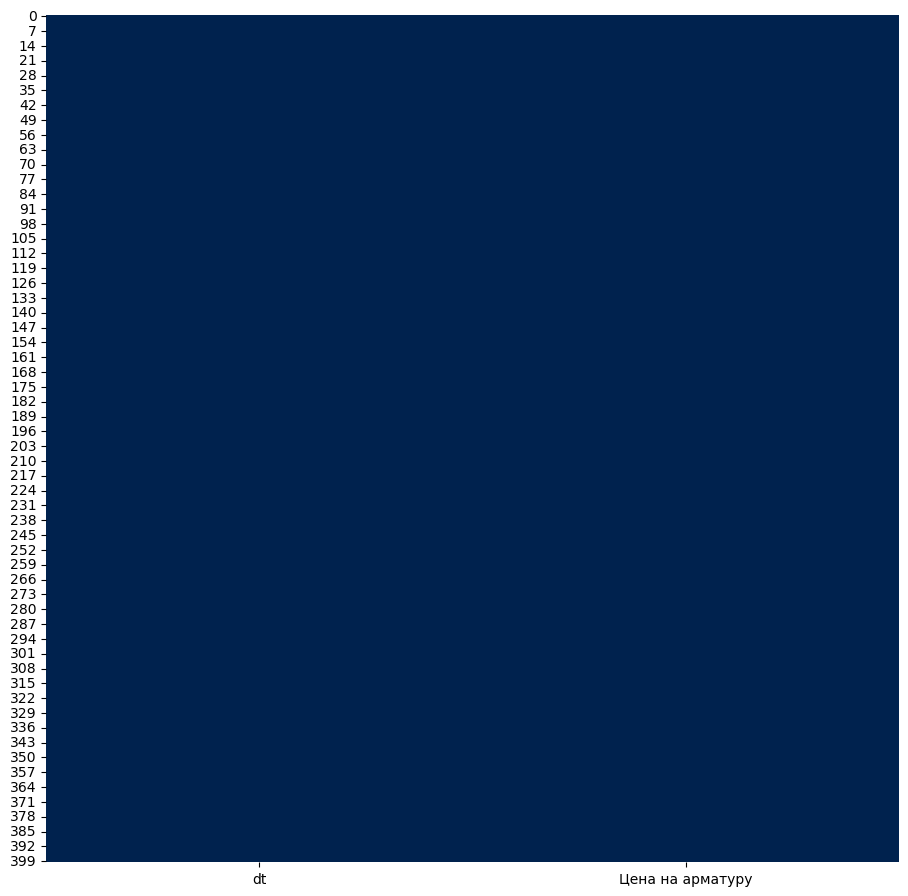

In [200]:
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(Data_Train.isnull(), cmap='cividis', cbar = False)

plt.show()

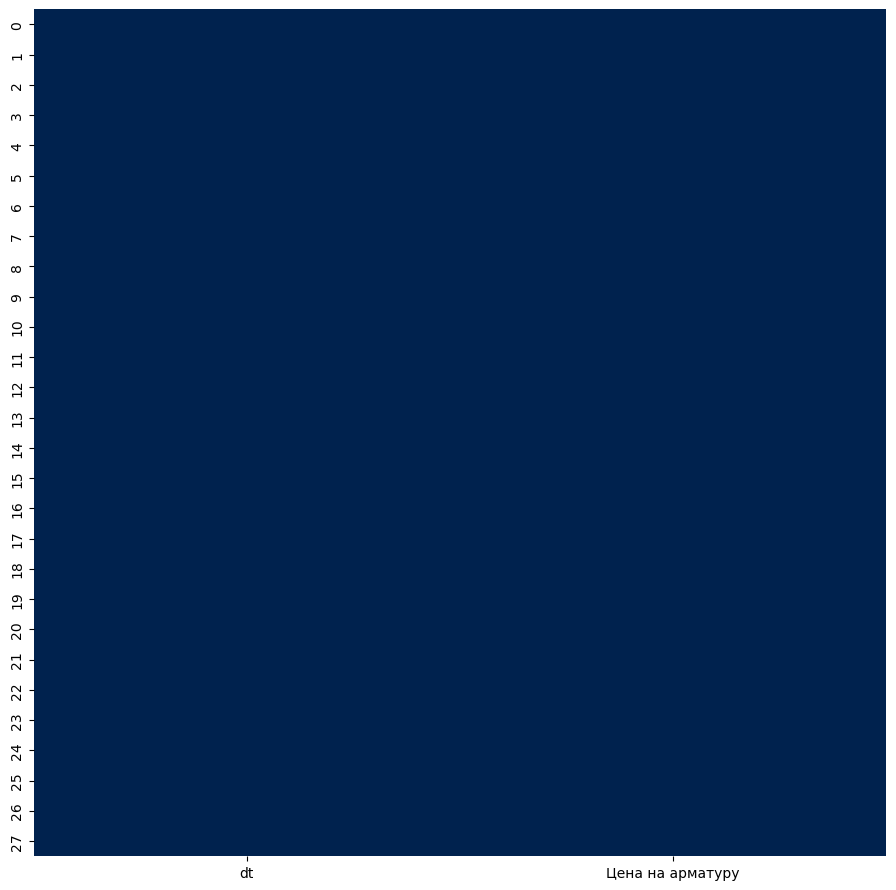

In [201]:
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(Data_Test.isnull(), cmap='cividis', cbar = False)

plt.show()

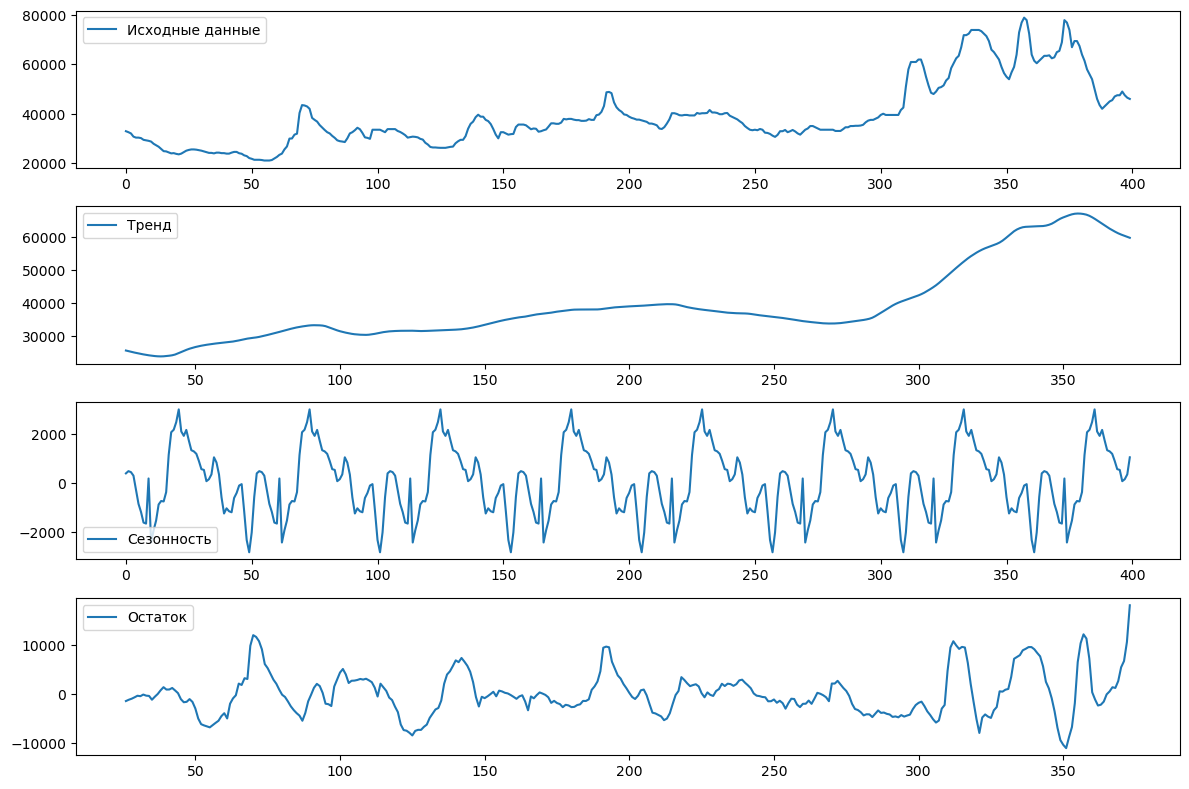

In [202]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Декомпозиция временного ряда
decomposition = seasonal_decompose(Data_Train ['Цена на арматуру'], model='additive', period=52)  # period=52 для еженедельных данных

# Визуализация компонентов
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(decomposition.observed, label='Исходные данные')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Тренд')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Сезонность')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Остаток')
plt.legend()

plt.tight_layout()
plt.show()

In [203]:
from statsmodels.tsa.stattools import adfuller

# Проверка на стационарность
result = adfuller(Data_Train['Цена на арматуру'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values: {result[4]}')



ADF Statistic: -1.9258699893713445
p-value: 0.3199906102569918
Critical Values: {'1%': -3.4470566389664703, '5%': -2.8689037160476016, '10%': -2.570692663557422}


In [204]:
Data_Train['Diff_1'] = Data_Train['Цена на арматуру'].diff()

In [205]:


# Проверка на стационарность
result = adfuller(Data_Train['Diff_1'][1:])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values: {result[4]}')


ADF Statistic: -7.706061504115208
p-value: 1.300693837380985e-11
Critical Values: {'1%': -3.447405233596701, '5%': -2.8690569369014605, '10%': -2.5707743450830893}


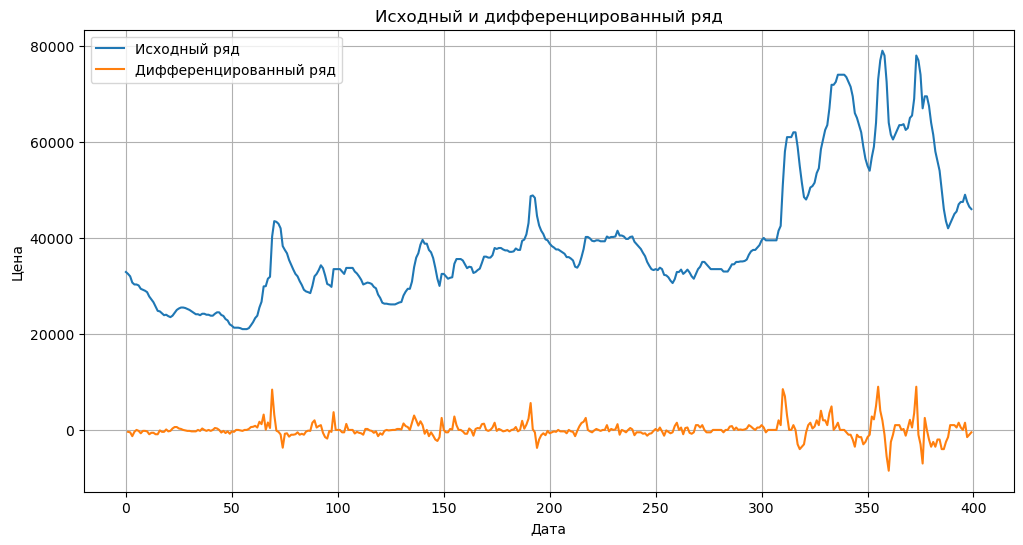

In [206]:
plt.figure(figsize=(12, 6))
plt.plot(Data_Train['Цена на арматуру'], label='Исходный ряд')
plt.plot(Data_Train['Diff_1'], label='Дифференцированный ряд')
plt.title('Исходный и дифференцированный ряд')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.grid(True)
plt.show()


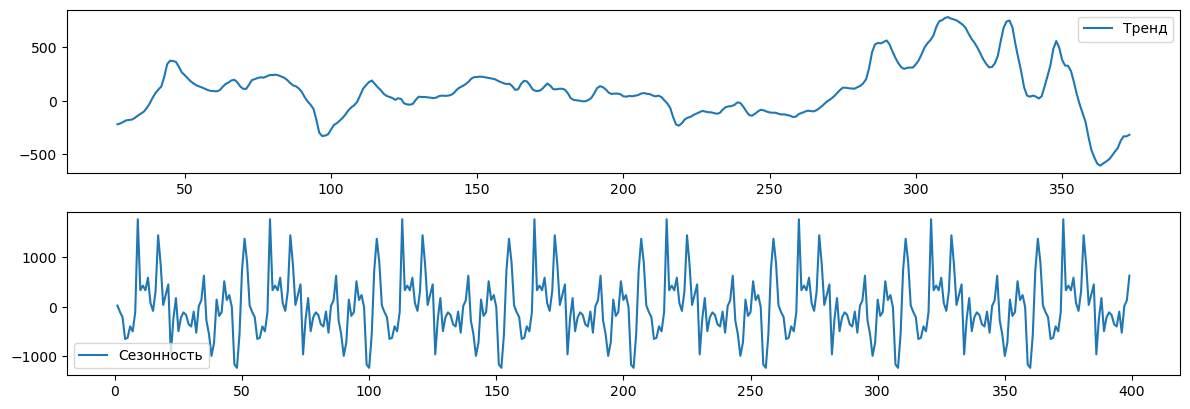

In [207]:
decomposition = seasonal_decompose(Data_Train['Diff_1'][1:], model='additive', period=52)  # period=52 для еженедельных данных

# Визуализация компонентов
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Тренд')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Сезонность')
plt.legend()

plt.tight_layout()
plt.show()

In [208]:
###для уменьшения дисперсии добавим скользящую среднею
Data_Train['Rol_Mean_Цена на арматуру'] = Data_Train['Цена на арматуру'].rolling(window=12).mean()
Data_Train['Rolling_Std'] = Data_Train['Цена на арматуру'].rolling(window=12).std()


In [209]:
Data_Train['Rol_Mean_Цена на арматуру 4'] = Data_Train['Цена на арматуру'].rolling(window=4).mean()
Data_Train['Rol_Mean_Цена на арматуру 12'] = Data_Train['Цена на арматуру'].rolling(window=12).mean()
Data_Train['Rol_Mean_Цена на арматуру 52'] = Data_Train['Цена на арматуру'].rolling(window=52).mean()

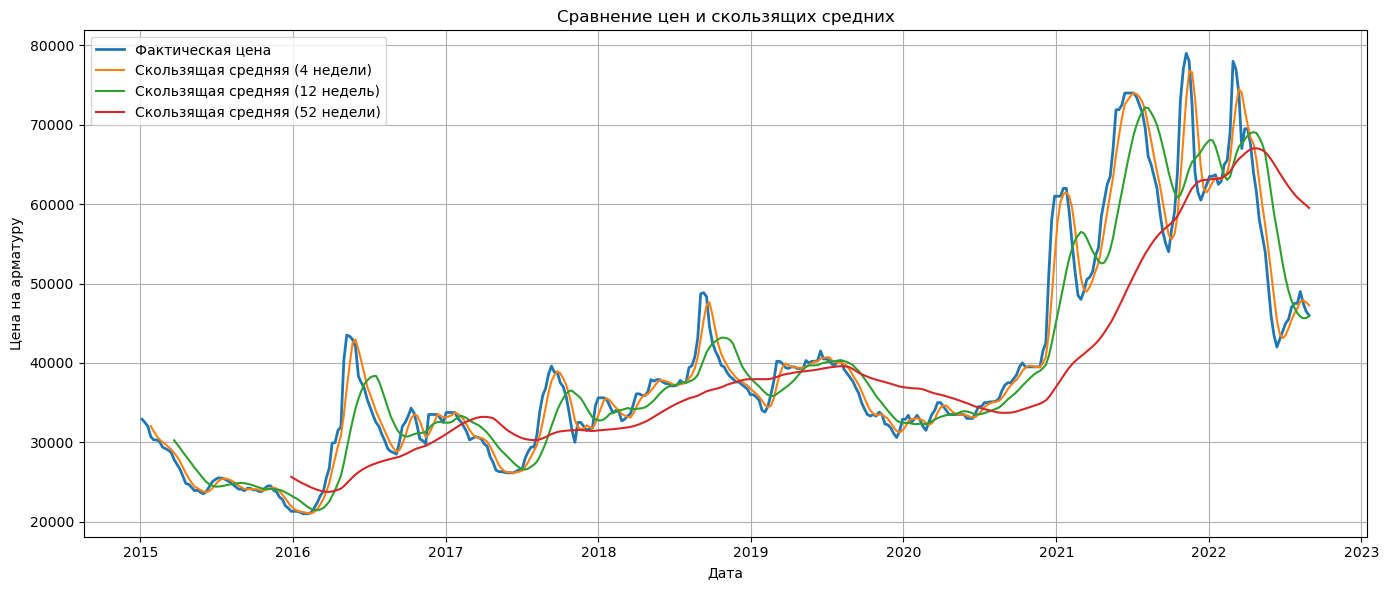

In [210]:
plt.figure(figsize=(14, 6))
plt.plot(Data_Train["dt"], Data_Train["Цена на арматуру"], label="Фактическая цена", linewidth=2)
plt.plot(Data_Train["dt"], Data_Train['Rol_Mean_Цена на арматуру 4'], label="Скользящая средняя (4 недели)")
plt.plot(Data_Train["dt"], Data_Train['Rol_Mean_Цена на арматуру 12'], label="Скользящая средняя (12 недель)")
plt.plot(Data_Train["dt"], Data_Train['Rol_Mean_Цена на арматуру 52'], label="Скользящая средняя (52 недели)")
plt.title("Сравнение цен и скользящих средних")
plt.xlabel("Дата")
plt.ylabel("Цена на арматуру")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

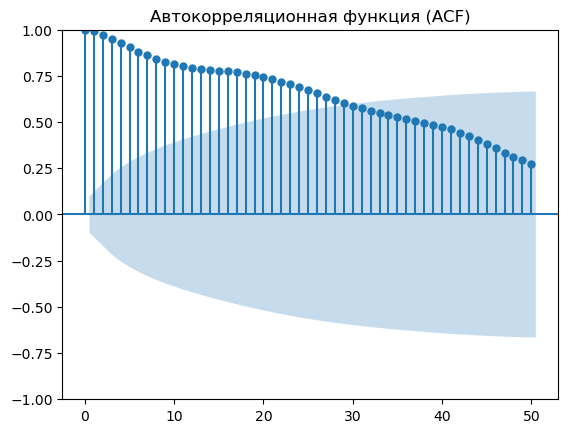

In [211]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Построение графика ACF
plot_acf(Data_Train['Цена на арматуру'], lags=50)  # lags=50 означает, что мы рассматриваем 50 лагов
plt.title('Автокорреляционная функция (ACF)')
plt.show()

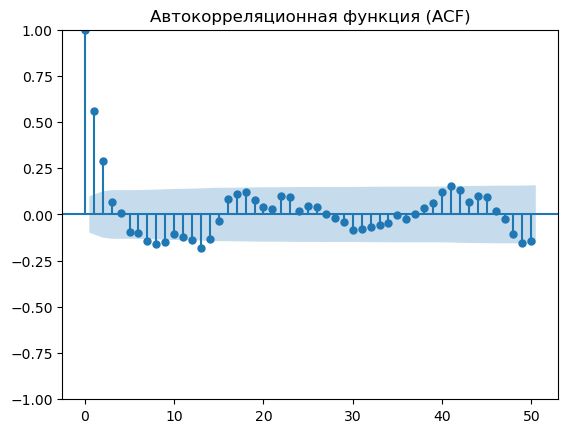

In [212]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Построение графика ACF
plot_acf(Data_Train['Diff_1'][1:], lags=50)  # lags=50 означает, что мы рассматриваем 50 лагов
plt.title('Автокорреляционная функция (ACF)')
plt.show()

In [3]:
import numpy as np

def outliers(Data, col="Цена на арматуру", window=4, threshold=2.5):
    Data = Data.copy()
    Data["MA"] = Data[col].rolling(window=window, center=True).mean()
    Data["delta"] = np.abs(Data[col] - Data["MA"])
    std = Data["delta"].std()

    # Где превышен порог — заменить на MA
    Data["cleaned"] = np.where(Data["delta"] > threshold * std, Data["MA"], Data[col])
    return Data

In [214]:
Data_Train = outliers(Data_Train)

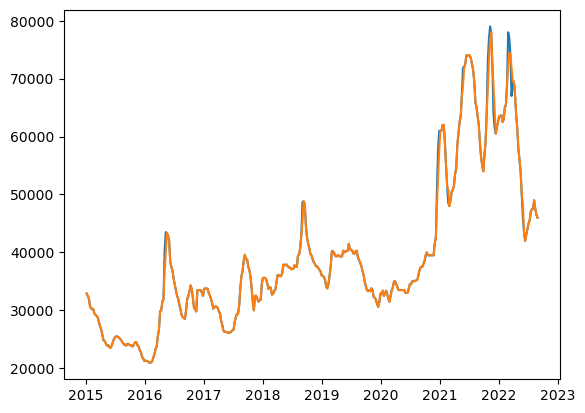

In [215]:
plt.plot(Data_Train["dt"], Data_Train["Цена на арматуру"], label="Оригинал")
plt.plot(Data_Train["dt"], Data_Train["cleaned"], label="После очистки")

In [216]:
Data_Train["Цена на арматуру"] = Data_Train["cleaned"]

In [217]:
from statsmodels.tsa.arima.model import ARIMA

In [218]:
Model_Arima = ARIMA(Data_Train['Цена на арматуру'], order=(1, 1, 1))
Model_fit_Arima = Model_Arima.fit()

In [219]:
print(Model_fit_Arima.summary())

                               SARIMAX Results                                
Dep. Variable:       Цена на арматуру   No. Observations:                  400
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3414.506
Date:                Thu, 27 Mar 2025   AIC                           6835.013
Time:                        14:44:08   BIC                           6846.980
Sample:                             0   HQIC                          6839.753
                                - 400                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5222      0.046     11.334      0.000       0.432       0.612
ma.L1         -0.1390      0.056     -2.474      0.013      -0.249      -0.029
sigma2        1.3e+06   4.74e+04     27.406      0.0

In [220]:
##Сделаем предсказание
forecast = Model_fit_Arima.forecast(steps=len(Data_Test))

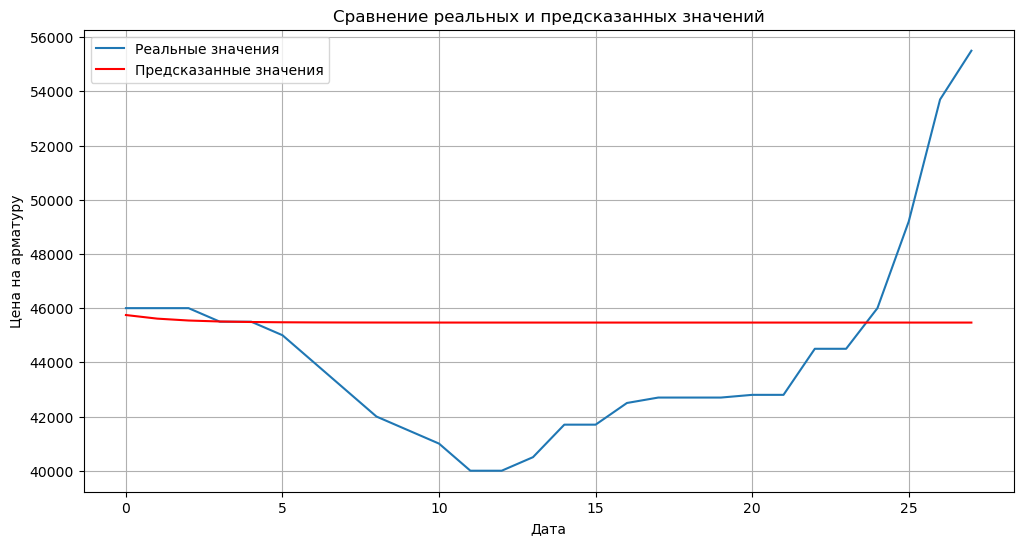

In [221]:
plt.figure(figsize=(12, 6))
plt.plot(Data_Test.index, Data_Test['Цена на арматуру'], label='Реальные значения')
plt.plot(Data_Test.index, forecast, label='Предсказанные значения', color='red')
plt.title('Сравнение реальных и предсказанных значений')
plt.xlabel('Дата')
plt.ylabel('Цена на арматуру')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [223]:
mae = mean_absolute_error(Data_Test['Цена на арматуру'], forecast)
mse = mean_squared_error(Data_Test['Цена на арматуру'], forecast)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((Data_Test['Цена на арматуру'] - forecast.values) / Data_Test['Цена на арматуру'])) * 100
r2= r2_score(Data_Test['Цена на арматуру'], forecast.values)

print(f'MAE: {round(mae, 2)}')
print(f'MSE: { round(mse, 2)}')
print(f'RMSE: { round(rmse, 2) }')
print(f'MAPE: { round(mape, 2) }%')
print(f'R2: { round(r2, 2) }%')

MAE: 2926.89
MSE: 14287683.42
RMSE: 3779.91
MAPE: 6.58%
R2: -0.11%


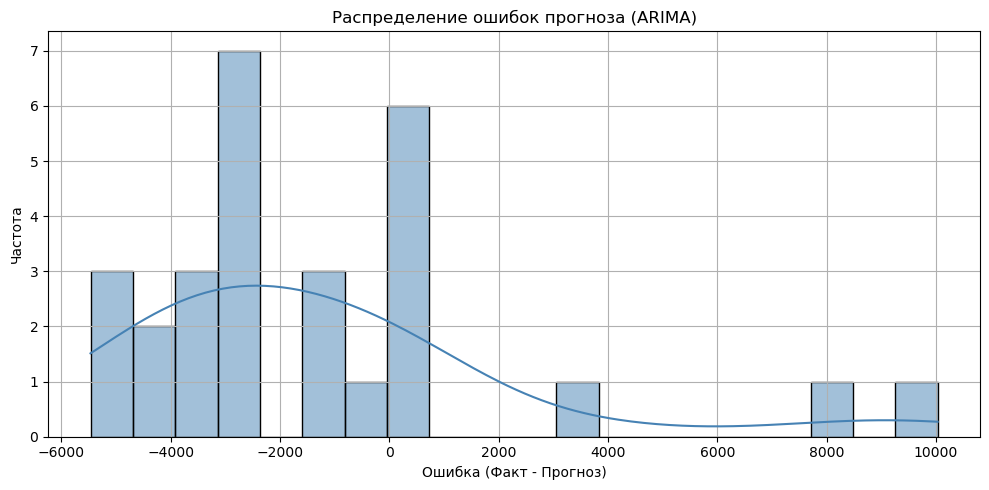

In [224]:
Data_Test["Прогноз"] = forecast
Data_Test["ошибка_RF"] = Data_Test['Цена на арматуру'] - forecast.values

plt.figure(figsize=(10, 5))
sns.histplot(Data_Test["ошибка_RF"], bins=20, kde=True, color="steelblue")
plt.title("Распределение ошибок прогноза (ARIMA)")
plt.xlabel("Ошибка (Факт - Прогноз)")
plt.ylabel("Частота")
plt.grid(True)
plt.tight_layout()
plt.show()

In [225]:
from pmdarima import auto_arima

model = auto_arima(Data_Train['Цена на арматуру'], seasonal=False, stepwise=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6828.328, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6953.093, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6838.805, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6870.915, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6951.295, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6828.616, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6830.658, Time=0.30 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6821.463, Time=0.61 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6819.111, Time=0.56 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6829.022, Time=0.11 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=6821.713, Time=0.82 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6832.926, Time=0.24 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=6829.492, Time=0.17 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=6822.406, Time=0.78 sec
 ARIMA(3,1,1)(0,0,0)[0]          

In [226]:
Model_Arima_Best_Param = ARIMA(Data_Train['Цена на арматуру'], order=(1, 1, 1))
Model_fit_Arima_Best_Param = Model_Arima_Best_Param.fit()

In [227]:
forecast_Arima_Best_Param = Model_fit_Arima_Best_Param.forecast(steps=len(Data_Test))

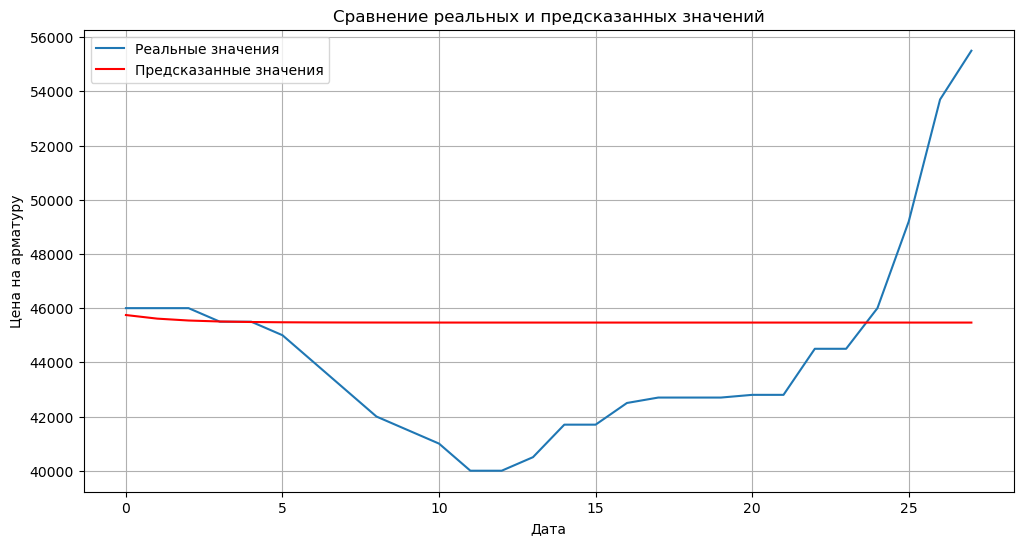

In [228]:
plt.figure(figsize=(12, 6))
plt.plot(Data_Test.index, Data_Test['Цена на арматуру'], label='Реальные значения')
plt.plot(Data_Test.index, forecast_Arima_Best_Param, label='Предсказанные значения', color='red')
plt.title('Сравнение реальных и предсказанных значений')
plt.xlabel('Дата')
plt.ylabel('Цена на арматуру')
plt.legend()
plt.grid(True)
plt.show()

In [229]:
mae  = mean_absolute_error(Data_Test['Цена на арматуру'], forecast_Arima_Best_Param)
mse  = mean_squared_error(Data_Test['Цена на арматуру'], forecast_Arima_Best_Param)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((Data_Test['Цена на арматуру']- forecast_Arima_Best_Param.values) / Data_Test['Цена на арматуру'])) * 100
r2   = r2_score(Data_Test['Цена на арматуру'], forecast_Arima_Best_Param.values)

print(f'MAE: {round(mae, 2) } ')
print(f'MSE: {round(mse, 2) }')
print(f'RMSE: {round(rmse, 2) }')
print(f'MAPE: {round(mape, 2) }%')
print(f'MAPE: {round(r2, 2) }%')



MAE: 2926.89 
MSE: 14287683.42
RMSE: 3779.91
MAPE: 6.58%
MAPE: -0.11%


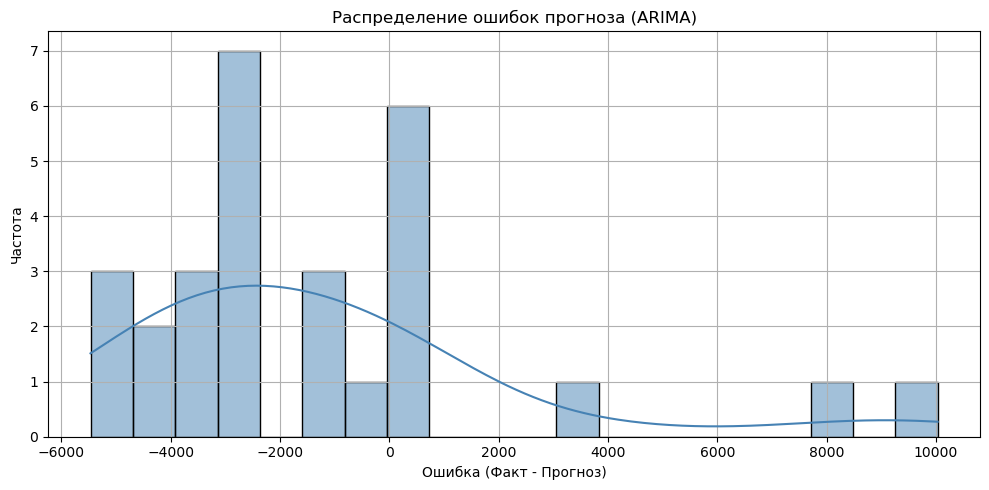

In [230]:
Data_Test["Прогноз_Arima_Best"] = forecast_Arima_Best_Param
Data_Test["ошибка_RF_Arima_Best"] = Data_Test['Цена на арматуру'] - forecast_Arima_Best_Param.values

plt.figure(figsize=(10, 5))
sns.histplot(Data_Test["ошибка_RF_Arima_Best"], bins=20, kde=True, color="steelblue")
plt.title("Распределение ошибок прогноза (ARIMA)")
plt.xlabel("Ошибка (Факт - Прогноз)")
plt.ylabel("Частота")
plt.grid(True)
plt.tight_layout()
plt.show()

In [231]:
import pmdarima as pm
ts = Data_Train.set_index("dt")["Цена на арматуру"]

# Автоматический подбор SARIMA (без сезонности для скорости)
model_auto = pm.auto_arima(
    ts,
    seasonal=True,
    m=52,  # сезонность — 52 недели
    start_p=0, start_q=0,
    max_p=2, max_q=2,
    start_P=0, start_Q=0,
    max_P=2, max_Q=2,
    max_order=6,
    d=1, D=1,
    trace=True,
    stepwise=True,
    suppress_warnings=True,
    error_action='ignore',
    n_fits=20
)

model_auto.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=6309.239, Time=14.74 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=6098.952, Time=8.26 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=24.44 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=6170.301, Time=2.20 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=6086.102, Time=19.48 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=inf, Time=139.68 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=inf, Time=51.86 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=6204.427, Time=13.73 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=6063.220, Time=71.26 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=6085.749, Time=11.16 sec
 ARIMA(2,1,0)(2,1,1)[52]             : AIC=inf, Time=154.36 sec
 ARIMA(2,1,0)(1,1,1)[52]             : AIC=inf, Time=66.13 sec
 ARIMA(2,1,1)(2,1,0)[52]             : AIC=6063.753, Time=151.20 sec
 ARIMA(1,1,1)(2,1,0)[52]             : AIC=6077.414, Time=38.69 sec
 ARIMA(2,1,0)(2,1,0)[52] inte

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  400
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 52)   Log Likelihood               -3026.610
Date:                            Thu, 27 Mar 2025   AIC                           6063.220
Time:                                    14:58:40   BIC                           6082.466
Sample:                                01-05-2015   HQIC                          6070.883
                                     - 08-29-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4259      0.019     22.102      0.000       0.388       0.464
ar.L2          0.1875      0.028      6.734      0.000       0.133       0.242
ar.S.L52      -0.5335      0.020    -27.306      0.000      -0.572      -0.495
ar.S.L104     -0.2261      0.019    -12.100      0.000      -0.263      -0.189
sigma2      1.972e+06   1.01e+05     19.552      0.000    1.77e+06    2.17e+06
===================================================================================
Ljung-Box (L1) (Q):                   5.21   Jarque-Bera (JB):               197.90
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                            -0.17
Prob(H) (two-sided):                  0.16   Kurtosis:                         6.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [232]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [233]:

Model_Sarima = SARIMAX(Data_Train.set_index("dt")["Цена на арматуру"], order=(2, 1, 0), seasonal_order=(2, 1, 1, 52),
                enforce_stationarity=False, enforce_invertibility=False)

Sarima_fit = Model_Sarima.fit(disp=False)


C:\Users\Aadmin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
C:\Users\Aadmin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


In [234]:
forecast_Sarima = Sarima_fit.forecast(steps=len(Data_Test))

In [235]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(Data_Test['Цена на арматуру'].values, forecast_Sarima)
mse  = mean_squared_error(Data_Test['Цена на арматуру'], forecast_Sarima)
rmse = np.sqrt(mean_squared_error(Data_Test['Цена на арматуру'].values, forecast_Sarima))
mape = np.mean(np.abs((Data_Test['Цена на арматуру']- forecast_Sarima.values) / Data_Test['Цена на арматуру'])) * 100
r2 = r2_score(Data_Test['Цена на арматуру'].values, forecast_Sarima)


In [236]:
print(f'MAE: {round(mae, 2)}')
print(f'MSE: { round(mse, 2)}')
print(f'RMSE: { round(rmse, 2) }')
print(f'MAPE: { round(mape, 2) }%')
print(f'R2: { round(r2, 2) }%')

MAE: 3402.68
MSE: 14794770.09
RMSE: 3846.4
MAPE: 7.72%
R2: -0.15%


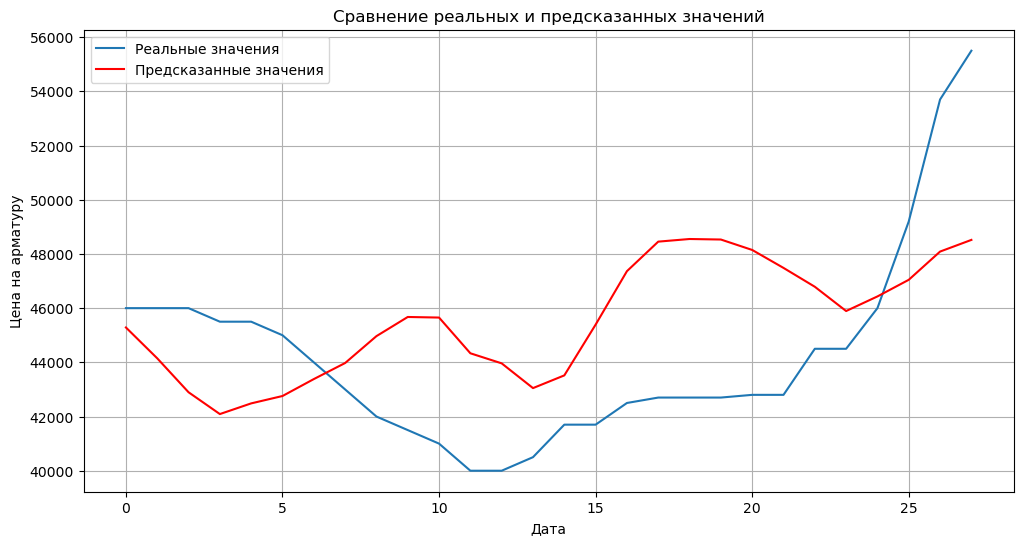

In [237]:
plt.figure(figsize=(12, 6))
plt.plot(Data_Test.index, Data_Test['Цена на арматуру'], label='Реальные значения')
plt.plot(Data_Test.index, forecast_Sarima, label='Предсказанные значения', color='red')
plt.title('Сравнение реальных и предсказанных значений')
plt.xlabel('Дата')
plt.ylabel('Цена на арматуру')
plt.legend()
plt.grid(True)
plt.show()

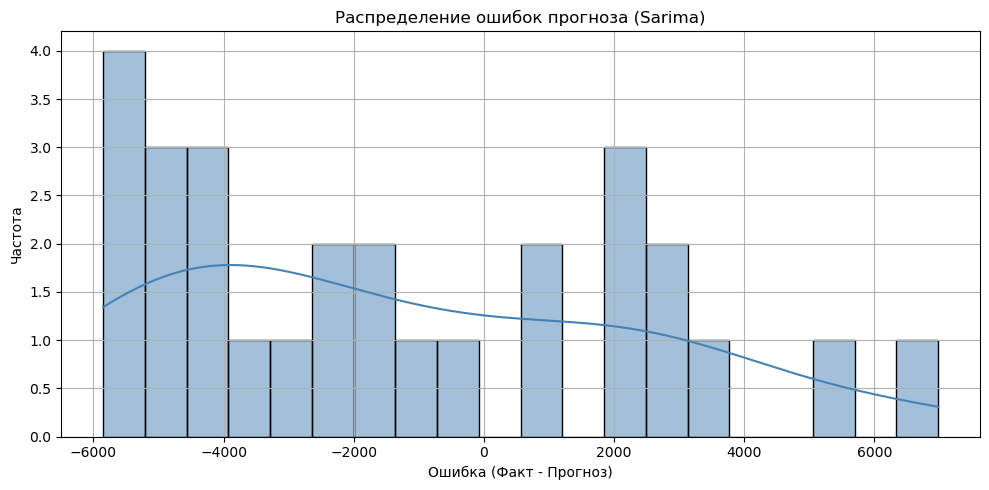

In [379]:
Data_Test["Прогноз_Sarima"] = forecast_Sarima
Data_Test["ошибка_RF_Sarima"] = Data_Test['Цена на арматуру'] - forecast_Sarima.values

plt.figure(figsize=(10, 5))
sns.histplot(Data_Test["ошибка_RF_Sarima"], bins=20, kde=True, color="steelblue")
plt.title("Распределение ошибок прогноза (Sarima)")
plt.xlabel("Ошибка (Факт - Прогноз)")
plt.ylabel("Частота")
plt.grid(True)
plt.tight_layout()
plt.show()

In [239]:
ts = Data_Train.set_index("dt")["Цена на арматуру"]
ts.index = pd.to_datetime(ts.index)
ts = ts.asfreq("W-MON")

In [240]:
Model_Sarima2 = SARIMAX(ts, order=(2, 1, 0), seasonal_order=(2, 1, 1, 52),
                enforce_stationarity=False, enforce_invertibility=False)

Sarima_fit2 = Model_Sarima2.fit(disp=False)


In [241]:
forecast_Sarima_fit2 = Sarima_fit2.get_forecast(steps=len(Data_Test))
forecast_values = forecast_Sarima_fit2.predicted_mean


In [242]:
mae1 = mean_absolute_error(Data_Test['Цена на арматуру'], forecast_values.values)
mse1 = mean_squared_error(Data_Test['Цена на арматуру'], forecast_values.values)
rmse1 = np.sqrt(mse)
mape1 = np.mean(np.abs((Data_Test['Цена на арматуру'] - forecast_values.values) / Data_Test['Цена на арматуру'])) * 100
r21 = r2_score(Data_Test['Цена на арматуру'].values, forecast_values.values)
print(f'MAE: {mae1}')
print(f'MSE: {mse1}')
print(f'RMSE: {rmse1}')
print(f'MAPE: {mape1}%')
print(f'R2: {r21}%')

MAE: 3402.67775816859
MSE: 14794770.087892413
RMSE: 3846.3970268151484
MAPE: 7.720134166773596%
R2: -0.15419899824743677%


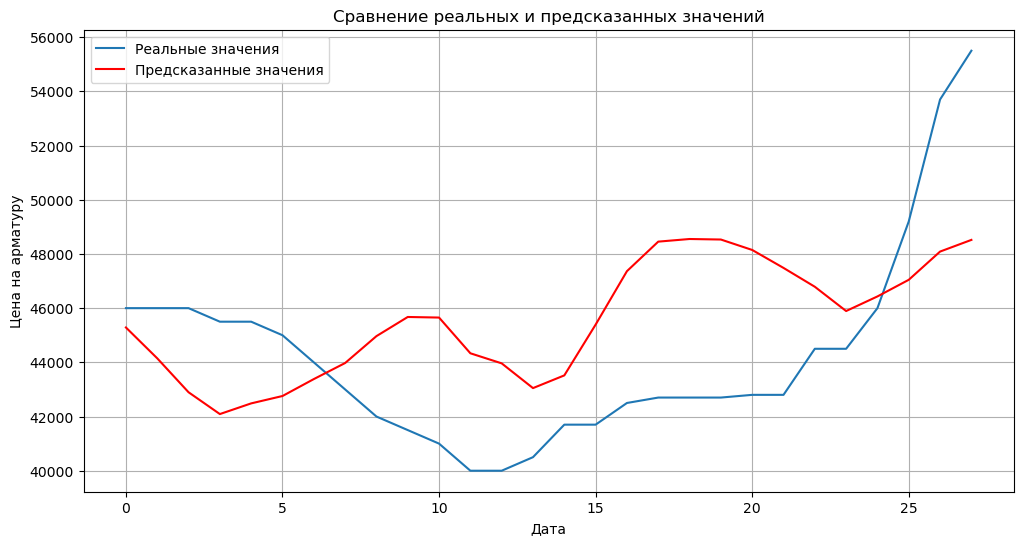

In [243]:
plt.figure(figsize=(12, 6))
plt.plot(Data_Test.index, Data_Test['Цена на арматуру'], label='Реальные значения')
plt.plot(Data_Test.index, forecast_Sarima, label='Предсказанные значения', color='red')
plt.title('Сравнение реальных и предсказанных значений')
plt.xlabel('Дата')
plt.ylabel('Цена на арматуру')
plt.legend()
plt.grid(True)
plt.show()

In [244]:
Data_Train_Prophet = pd.read_excel("train.xlsx", engine="openpyxl")
Data_Test_Prophet  = pd.read_excel("test.xlsx", engine="openpyxl")

In [245]:
from prophet import Prophet

Model_Prophet = Prophet()

In [246]:
Data_Train_Prophet = Data_Train_Prophet.rename(columns={"dt": "ds", "Цена на арматуру": "y"})

In [247]:
Model_Prophet = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)

In [248]:
Model_Prophet.fit(Data_Train_Prophet)

15:02:42 - cmdstanpy - INFO - Chain [1] start processing
15:02:42 - cmdstanpy - INFO - Chain [1] done processing


In [249]:
predict = Model_Prophet.make_future_dataframe(periods=len(Data_Test_Prophet), freq="W-MON")
forecast_Prophet = Model_Prophet.predict(predict)

In [250]:
forecast_trimmed = forecast_Prophet[["ds", "yhat"]].set_index("ds")
Data_Test_Prophet["dt"] = pd.to_datetime(Data_Test_Prophet["dt"])
Data_Test_Prophet = Data_Test_Prophet.set_index("dt")
Data_Test_Prophet["Prophet_Прогноз"] = forecast_trimmed.loc[Data_Test_Prophet.index, "yhat"]



In [251]:
# Метрики
mae = mean_absolute_error(Data_Test_Prophet["Цена на арматуру"], Data_Test_Prophet["Prophet_Прогноз"])
rmse = mean_squared_error(Data_Test_Prophet["Цена на арматуру"], Data_Test_Prophet["Prophet_Прогноз"], squared=False)
r2 = r2_score(Data_Test_Prophet["Цена на арматуру"], Data_Test_Prophet["Prophet_Прогноз"])

print(f"MAE:  {mae:.2f} ")
print(f"RMSE: {rmse:.2f} ")
print(f"R²:   {r2:.4f}")

MAE:  25222.53 
RMSE: 25518.03 
R²:   -49.8003


C:\Users\Aadmin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


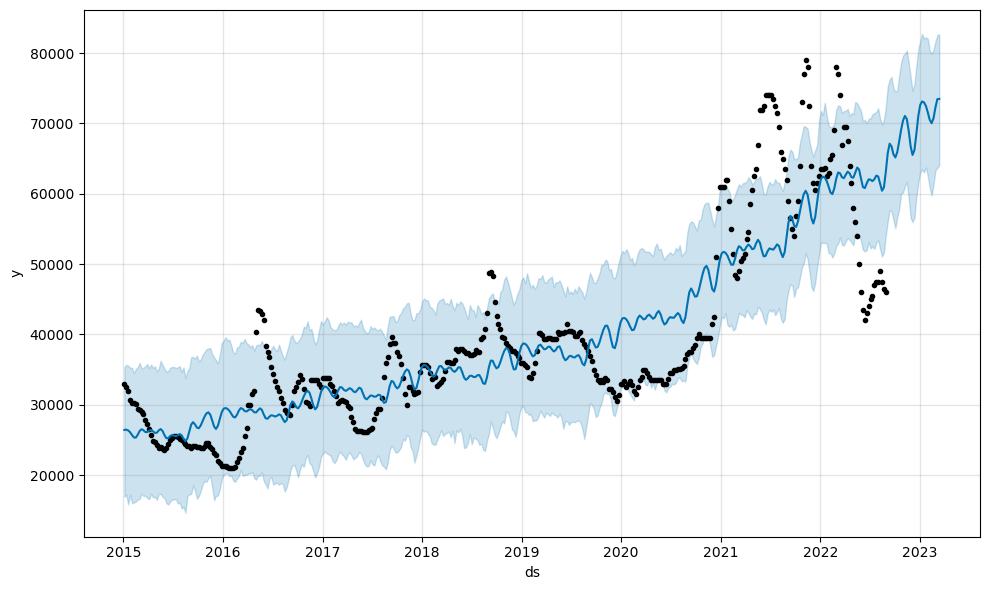

In [252]:
Model_Prophet.plot(forecast_Prophet);

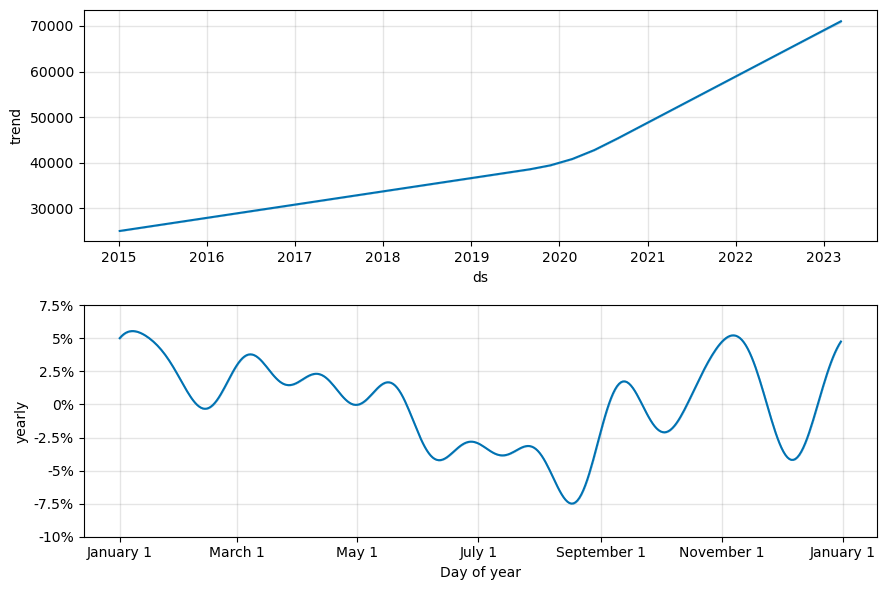

In [253]:
Model_Prophet.plot_components(forecast_Prophet);

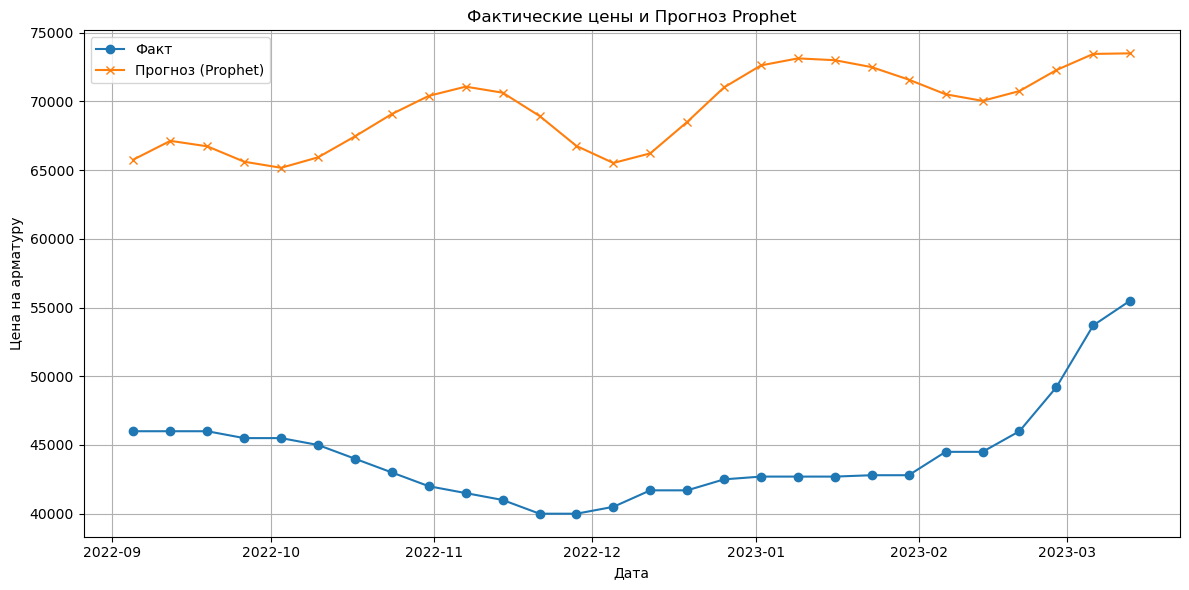

In [254]:
plt.figure(figsize=(12, 6))
plt.plot(Data_Test_Prophet.index, Data_Test_Prophet["Цена на арматуру"], label="Факт", marker='o')
plt.plot(Data_Test_Prophet.index, Data_Test_Prophet["Prophet_Прогноз"], label="Прогноз (Prophet)", marker='x')
plt.title("Фактические цены и Прогноз Prophet")
plt.xlabel("Дата")
plt.ylabel("Цена на арматуру")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
from sklearn.ensemble import RandomForestRegressor
import joblib
import os

In [7]:
Data_Train = pd.read_excel("train.xlsx", engine="openpyxl")
Data_Test  = pd.read_excel("test.xlsx", engine="openpyxl")

In [9]:
Data_Train["is_train"] = 1
Data_Test["is_train"] = 0

Data_Sceler = pd.concat([Data_Train,Data_Test ], ignore_index=True)

In [11]:
Data_Sceler = Data_Sceler.sort_values("dt")

In [13]:
Data_Sceler["week"] = Data_Sceler["dt"].dt.isocalendar().week
Data_Sceler["month"] = Data_Sceler["dt"].dt.month
Data_Sceler["quarter"] = Data_Sceler["dt"].dt.quarter
Data_Sceler["year"] = Data_Sceler["dt"].dt.year

In [15]:
for lag in [1, 2, 4, 12]:
    Data_Sceler[f"lag_{lag}"] = Data_Sceler["Цена на арматуру"].shift(lag)
    Data_Sceler[f"rolling_mean_{lag}"] = Data_Sceler["Цена на арматуру"].shift(1).rolling(window=lag).mean()


In [17]:
Data_Sceler= Data_Sceler.fillna(Data_Sceler['Цена на арматуру'].rolling(window=4, min_periods=1, center=True).mean())

In [19]:
Data_Sceler = outliers(Data_Sceler)

In [21]:
Data_Sceler["Цена на арматуру"] = Data_Sceler["cleaned"]

In [23]:
Data_Train_clear = Data_Sceler[Data_Sceler["is_train"] == 1].copy()
Data_Test_clear = Data_Sceler[Data_Sceler["is_train"] == 0].copy()


In [25]:
features = [col for col in Data_Train_clear.columns if col not in ["dt", "Цена на арматуру", "is_train"]]
target = "Цена на арматуру"

In [27]:
X_train = Data_Train_clear[features]
y_train = Data_Train_clear[target]
X_test = Data_Test_clear[features]

In [29]:
##StandardScaler для маштабирования
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [33]:
ModelRFR = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
ModelRFR.fit(X_train_scaled, y_train)


RandomForestRegressor(max_depth=10, random_state=42)

In [35]:
predict = ModelRFR.predict(X_test_scaled)


Data_Test_clear["RF_Прогноз"] = predict
Data_Test_clear = Data_Test_clear.set_index("dt")

y_true = Data_Test_clear["Цена на арматуру"]
y_pred = Data_Test_clear["RF_Прогноз"]



In [43]:
mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
r2 = r2_score(y_true, y_pred)

print(f"MAE:  {mae:.2f} ")
print(f"RMSE: {rmse:.2f} ")
print(f"R²:   {r2:.4f}")

MAE:  125.71 
RMSE: 196.43 
R²:   0.9966


C:\Users\Aadmin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


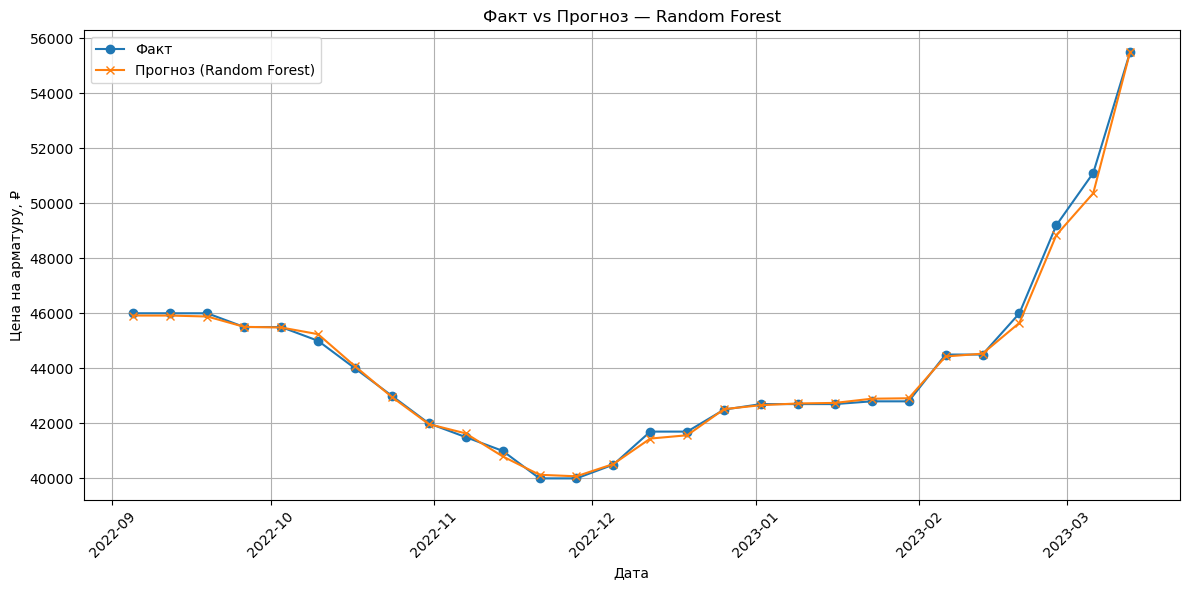

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(Data_Test_clear.index, Data_Test_clear["Цена на арматуру"], label="Факт", marker="o")
plt.plot(Data_Test_clear.index, Data_Test_clear["RF_Прогноз"], label="Прогноз (Random Forest)", marker="x")
plt.title("Факт vs Прогноз — Random Forest")
plt.xlabel("Дата")
plt.ylabel("Цена на арматуру, ₽")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

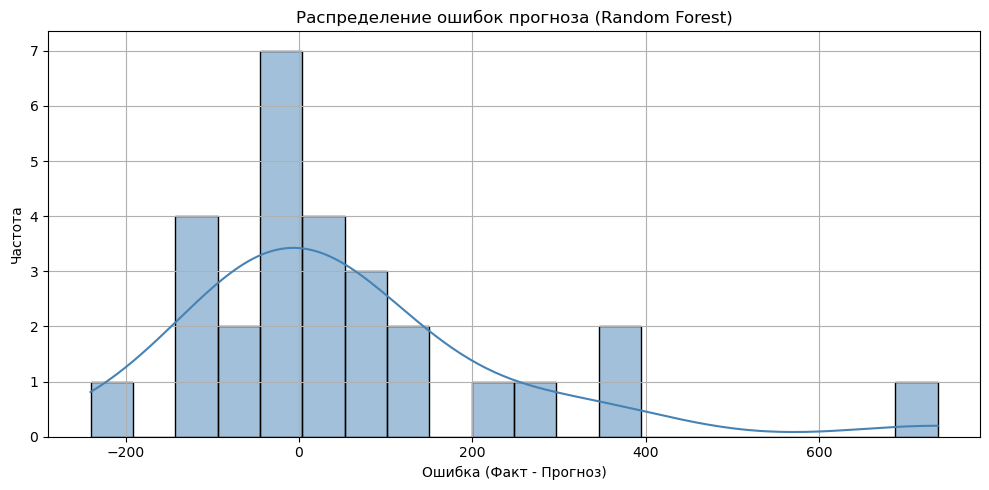

In [273]:
Data_Test_clear["RF_Прогноз"] = predict
Data_Test_clear["ошибка_RF"] = y_true - predict

plt.figure(figsize=(10, 5))
sns.histplot(Data_Test_clear["ошибка_RF"], bins=20, kde=True, color="steelblue")
plt.title("Распределение ошибок прогноза (Random Forest)")
plt.xlabel("Ошибка (Факт - Прогноз)")
plt.ylabel("Частота")
plt.grid(True)
plt.tight_layout()
plt.show()

In [274]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [275]:
tscv = TimeSeriesSplit(n_splits=5)

In [276]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Инициализация модели
rf = RandomForestRegressor(random_state=42)

# Grid Search
grid_searchRFR = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=tscv,
    verbose=1,
    n_jobs=-1
)

# Обучение
grid_searchRFR.fit(X_train_scaled, y_train)

# Лучшие параметры и модель
best_model = grid_searchRFR.best_estimator_
print(" Лучшие параметры:", grid_searchRFR.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
 Лучшие параметры: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [59]:
ModelRFR2 = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=42, max_features="sqrt", min_samples_leaf= 2, min_samples_split = 4  )
ModelRFR2.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=4, n_estimators=200, random_state=42)

In [61]:
predictions2 = ModelRFR2.predict(X_test_scaled)
Data_Test_clear["RF_Прогноз2"] = predictions2
y_true = Data_Test_clear["Цена на арматуру"]
y_pred = Data_Test_clear["RF_Прогноз2"]


In [63]:
maeRFR = mean_absolute_error(y_true, y_pred)
rmseRFR = mean_squared_error(y_true, y_pred, squared=False)
r2RFR = r2_score(y_true, y_pred)

print(" Метрики Random Forest:")
print(f"MAE:  {maeRFR:.2f} ")
print(f"RMSE: {rmseRFR:.2f} ")
print(f"R²:   {r2RFR:.4f}")

 Метрики Random Forest:
MAE:  723.32 
RMSE: 1021.82 
R²:   0.9076


C:\Users\Aadmin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


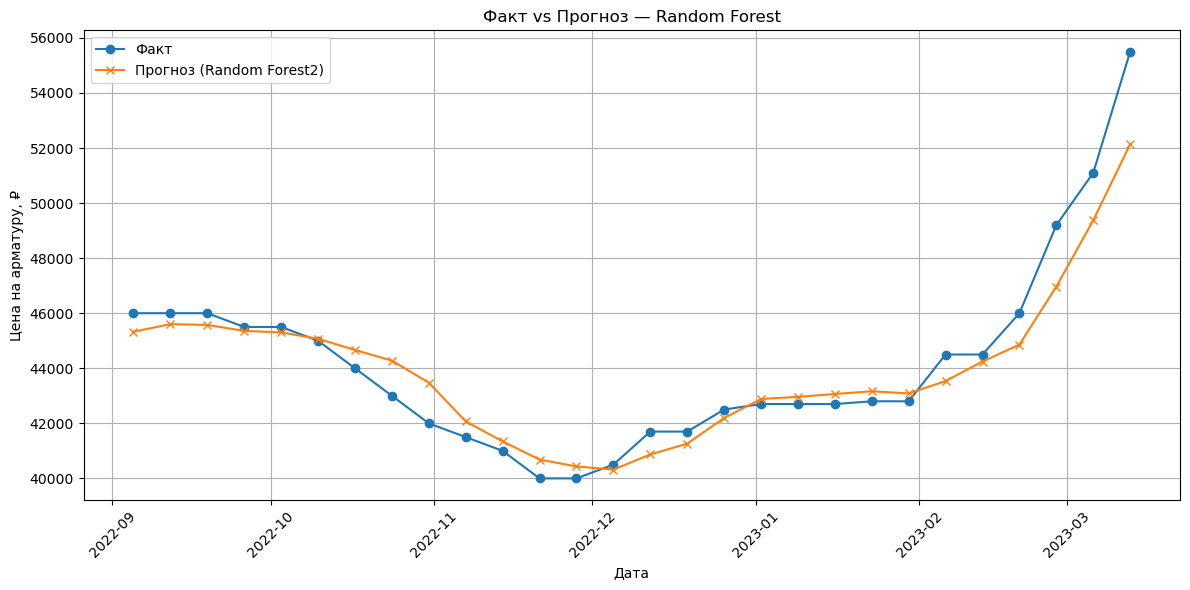

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(Data_Test_clear.index, Data_Test_clear["Цена на арматуру"], label="Факт", marker="o")
plt.plot(Data_Test_clear.index, Data_Test_clear["RF_Прогноз2"], label="Прогноз (Random Forest2)", marker="x")
plt.title("Факт vs Прогноз — Random Forest")
plt.xlabel("Дата")
plt.ylabel("Цена на арматуру, ₽")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [73]:
train_preds = ModelRFR2.predict(X_train_scaled)

mae_train = mean_absolute_error(y_train, train_preds)
rmse_train = mean_squared_error(y_train, train_preds, squared=False)
r2_train = r2_score(y_train, train_preds)

print("=== ОЦЕНКА НА ПЕРЕОБУЧЕНИЕ ===")
print(f"[ОБУЧЕНИЕ]  MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.4f}")
print(f"[ТЕСТ]      MAE: {maeRFR:.2f}, RMSE: {rmseRFR:.2f}, R²: {r2RFR:.4f}")

# Разница
print(f"Разница R² (train - test): {r2_train - r2RFR:.4f}")

=== ОЦЕНКА НА ПЕРЕОБУЧЕНИЕ ===
[ОБУЧЕНИЕ]  MAE: 529.37, RMSE: 693.12, R²: 0.9973
[ТЕСТ]      MAE: 723.32, RMSE: 1021.82, R²: 0.9076
Разница R² (train - test): 0.0897


C:\Users\Aadmin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [69]:
import joblib
import os

In [71]:

joblib.dump(ModelRFR2, "model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [283]:
Data_Train_Test = pd.concat([Data_Train, Data_Test], ignore_index= True)
Data_Train_Test.to_excel("Data.xlsx", index=False)